/Users/michielk/anaconda/envs/zwatershed/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


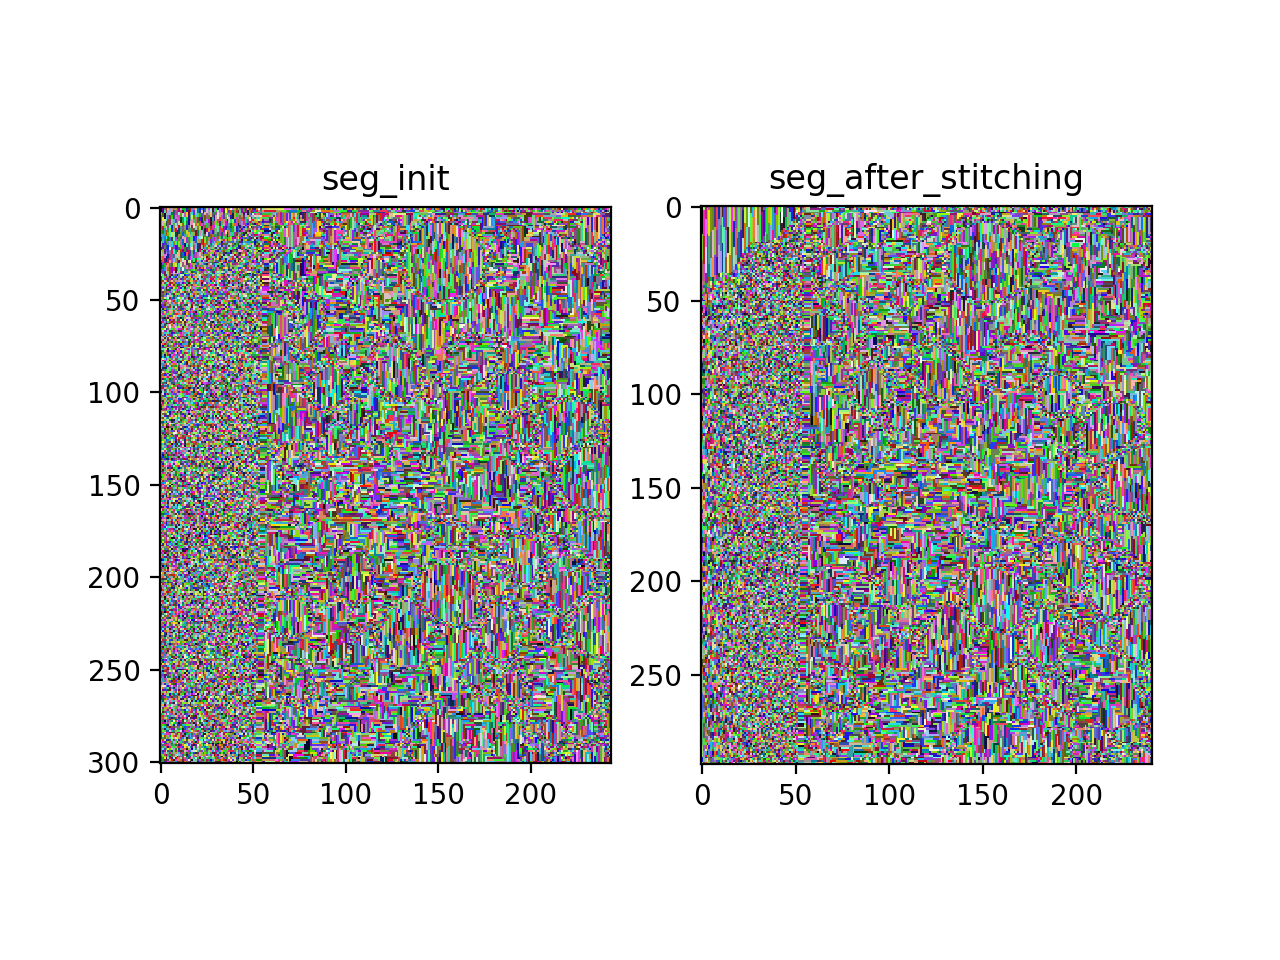

In [1]:
%matplotlib nbagg

import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from multiprocessing import Pool
from itertools import product
from zwatershed import (partition_subvols,
                        eval_with_par_map,
                        stitch_and_save,
                        merge_by_thresh)
# from par_funcs import *
# sys.path.append('..')
cmap = matplotlib.colors.ListedColormap(np.vstack( ((0, 0, 0), np.random.rand(1e6, 3))) )
V = 20

datadir = "/Users/michielk/oxdata/P01/EM/Myrf_01/SET-B/B-NT-S10-2f_ROI_00"
zwsbase = os.path.join(datadir, "zws")
outname = os.path.join(datadir, 'B-NT-S10-2f_ROI_00ds7_probs_zws.h5')  # dataset: 'main'

num,thresh = 0,2000

plt.subplot(1,2,1)
basic_file = h5py.File(zwsbase + '0_0_0_vol/'+'basic.h5','r')
seg_init = np.array(basic_file['seg'])
rg_init = np.array(basic_file['rg'])
keeps = rg_init[:,0]<rg_init[:,1]
rg_init = rg_init[keeps,:]

seg_sizes_init = np.array(basic_file['counts'])
basic_file.close()
plt.imshow(seg_init[V,:,:], cmap=cmap)
plt.title('seg_init')


In [4]:
plt.subplot(1,2,2)
f = h5py.File(outname, 'a')
s,e = f['starts'][num],f['ends'][num]
seg = f['seg'][s[0]:e[0]-3,s[1]:e[1]-3,s[2]:e[2]-3]
seg_sizes = np.array(f['seg_sizes'])
rg = np.array(f['rg_'+str(num)])
f.close()
plt.imshow(seg[V,:,:], cmap=cmap)
plt.title('seg_after_stitching')
plt.show()

print "num_segs",len(np.unique(seg_init)),len(np.unique(seg))
print "rg lens",len(rg_init),len(rg)



num_segs 2374246 2334389
rg lens 10733980 10733960


In [5]:
# seg_init_merged = merge_by_thresh(seg_init,seg_sizes_init,rg_init,thresh)
seg_merged = merge_by_thresh(seg,seg_sizes,rg,thresh)

plt.subplot(1,2,1)
plt.imshow(seg_init_merged[V,:,:], cmap=cmap)
plt.title('merged init')
plt.subplot(1,2,2)
plt.imshow(seg_merged[V,:,:], cmap=cmap)
plt.title('merged')
plt.show()

print "num_segs",len(np.unique(seg_init)),len(np.unique(seg))
print "rg lens",len(rg_init),len(rg)


calculating renums...


/Users/michielk/anaconda/envs/zwatershed/lib/python2.7/site-packages/zwatershed/par_funcs.py:199: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if seg_sizes[n1] < size or seg_sizes[n2] < size:


filtering renums...
renumbering...


/Users/michielk/anaconda/envs/zwatershed/lib/python2.7/site-packages/zwatershed/par_funcs.py:201: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  seg_sizes[n1]+=seg_sizes[n2]
/Users/michielk/anaconda/envs/zwatershed/lib/python2.7/site-packages/zwatershed/par_funcs.py:202: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  seg_sizes[n2]+=seg_sizes[n1]
/Users/michielk/anaconda/envs/zwatershed/lib/python2.7/site-packages/zwatershed/par_funcs.py:214: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  mp[re_filtered.keys()] = re_filtered.values()


NameError: name 'seg_init_merged' is not defined